In [12]:
import math
import nilearn as ni
from nilearn import plotting
from nilearn import image
from nilearn.image import math_img
from nilearn.image import index_img
from nilearn.regions import connected_regions
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import numpy as np


In [17]:
wm = image.load_img("wm_optimized.nii")
action = image.load_img("action_optimized.nii")
ltm = image.load_img("ltm_optimized.nii")
perception = image.load_img("perception_optimized.nii")
pm = image.load_img("procedural_optimized.nii")

IMAGES = [wm, ltm, action, pm,  perception]
NAMES = ["Working Memory", "Long-Term Memory", "Action", "Procedural", "Perception"]
COLORS = ["aqua", "orange", "darkorchid", "limegreen", "tomato"]


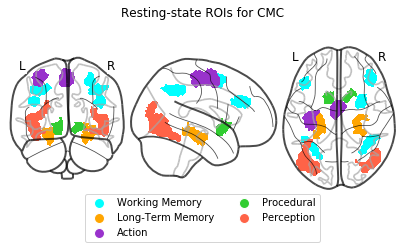

In [28]:
fig, axs = plt.subplots(1,1, figsize=(7, 3.5))
display = plotting.plot_glass_brain(None, axes=axs)
for img, col in zip(IMAGES, COLORS):
    display.add_contours(img, levels=[0.001], filled=True, colors=col)

handles = [Line2D([0], [0], marker='o', markerfacecolor=x, color="w", markersize=10) for x in COLORS]

axs.set_title("Resting-state ROIs for CMC")
fig.legend(handles, NAMES, loc="lower center", ncol=2)
plt.savefig("cmc_regions_optimized.png", figsize=(7, 3.5))
plt.show()